In [2]:
import pandas as pd
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
train['LoanAmount'].fillna(train.LoanAmount.mean(),inplace=True)
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.mean(),inplace=True)
train['Credit_History'].fillna(train.Credit_History.mean(),inplace=True)

In [6]:
for col in train.columns:
    train[col].fillna(train[col].mode()[0],inplace = True) 

In [7]:
train.drop(columns=['Loan_ID'],inplace=True)
test.drop(columns=['Loan_ID'],inplace=True)

In [8]:
test['LoanAmount'].fillna(test.LoanAmount.mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.mean(),inplace=True)
test['Credit_History'].fillna(test.Credit_History.mean(),inplace=True)

In [9]:
Y_train = train['Loan_Status'] == 'Y'

In [10]:
X_train = train.drop(columns=['Loan_Status'])

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [12]:
X_train = pd.get_dummies(X_train,drop_first=True,)

In [13]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    uint8  
 6   Married_Yes              614 non-null    uint8  
 7   Dependents_1             614 non-null    uint8  
 8   Dependents_2             614 non-null    uint8  
 9   Dependents_3+            614 non-null    uint8  
 10  Education_Not Graduate   614 non-null    uint8  
 11  Self_Employed_Yes        614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int64(1), u

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

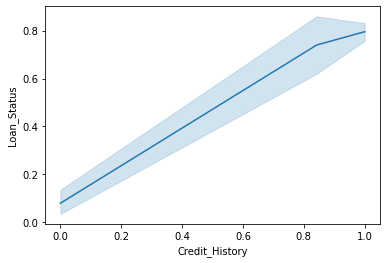

In [15]:
sns.lineplot(x=X_train["Credit_History"],y=Y_train)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

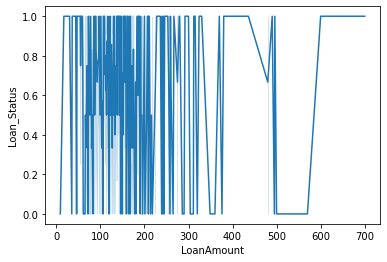

In [16]:
sns.lineplot(x=X_train["LoanAmount"],y=Y_train)

In [17]:
pd.DataFrame(X_train.min()).transpose().to_csv('./data/normalmin.csv')
pd.DataFrame(X_train.max()).transpose().to_csv('./data/normalmax.csv')